<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Deep%20Learning%20with%20PyTorch/Deep%20Networks/Momentum_with_Polynomial_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Momentum with Different Polynomials
---

In [1]:
import torch
import torch.nn as nn
import matplotlib.pylab as plt
import numpy as np

In [3]:
# Plot the cubic
def plot_cubic(w, optimizer):
    LOSS = []
    # parameter values
    W = torch.arange(-4, 4, 0.1)
    # plot the loss fuction
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(cubic(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 4.0
    n_epochs = 10
    parameter = []
    loss_list = []

    # n_epochs
    # Use PyTorch custom module to implement a ploynomial function
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = cubic(w(torch.tensor([[1.0]])))
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='parameter values')

    plt.plot(W.numpy(), LOSS, label='objective function')
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

# Plot the fourth order function and the parameter values
def plot_fourth_order(w, optimizer, std=0, color='r', paramlabel='parameter values', objfun=True):
    W = torch.arange(-4, 6, 0.1)
    LOSS = []
    for w.state_dict()['linear.weight'][0] in W:
        LOSS.append(fourth_order(w(torch.tensor([[1.0]]))).item())
    w.state_dict()['linear.weight'][0] = 6
    n_epochs = 100
    parameter = []
    loss_list = []

    #n_epochs
    for n in range(n_epochs):
        optimizer.zero_grad()
        loss = fourth_order(w(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        loss_list.append(loss)
        parameter.append(w.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()

    # Plotting
    if objfun:
        plt.plot(W.numpy(), LOSS, label='objective function')

    plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)
    plt.xlabel('w')
    plt.ylabel('l(w)')
    plt.legend()

# Create a linear model
class one_param(nn.Module):
    def __init__(self, input_size, output_size):
        super(one_param, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [5]:
# Create a one_param object
w = one_param(1, 1)

## Saddle Points

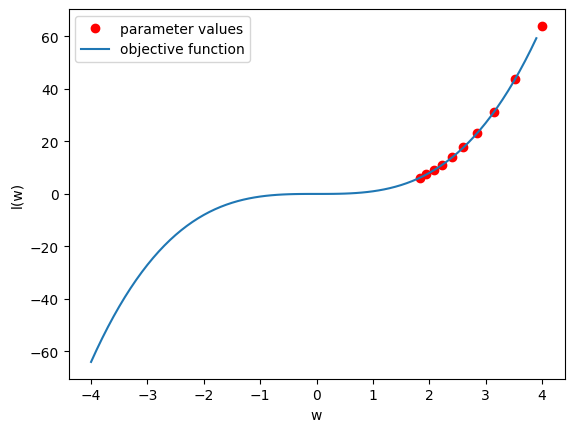

In [6]:
# Define a function to output a cubic
def cubic(yhat):
    out = yhat ** 3
    return out

optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0)
plot_cubic(w, optimizer)

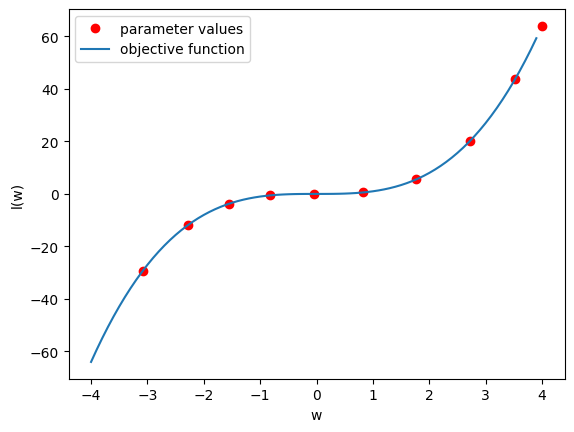

In [7]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.01, momentum=0.9)
plot_cubic(w, optimizer)

## Local Minima

<ipython-input-3-327db46da27c>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


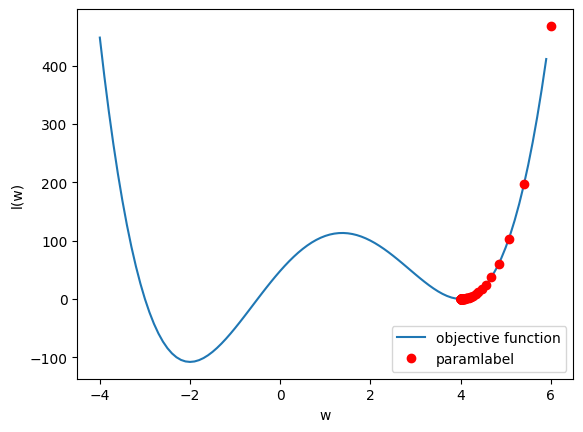

In [8]:
# Create a function to calculate the fourth order polynomial
def fourth_order(yhat):
    out = torch.mean(2 * (yhat ** 4) - 9 * (yhat ** 3) - 21 * (yhat ** 2) + 88 * yhat + 48)
    return out

optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer)

<ipython-input-3-327db46da27c>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


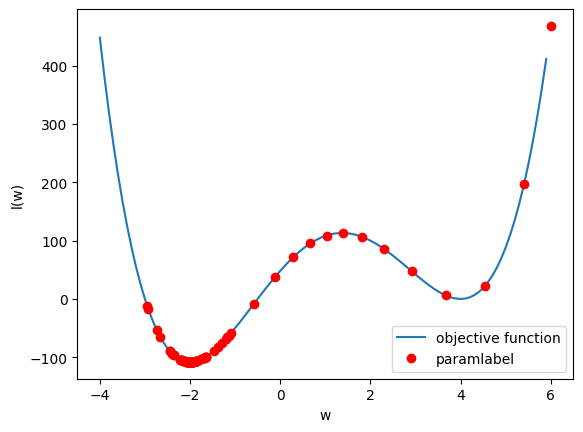

In [9]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001, momentum=0.9)
plot_fourth_order(w, optimizer)

## Noise

<ipython-input-3-327db46da27c>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


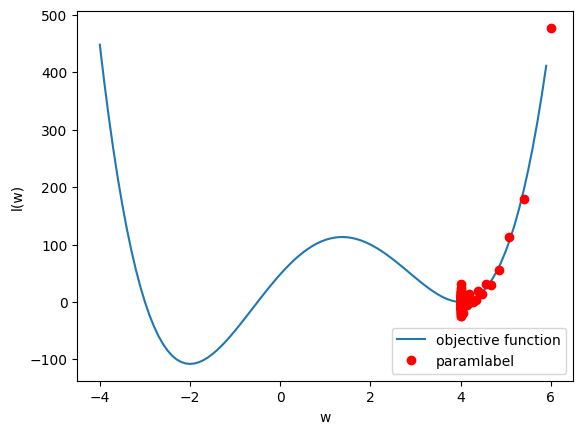

In [10]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001)
plot_fourth_order(w, optimizer, std=10)

<ipython-input-3-327db46da27c>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(parameter, [loss.detach().numpy().flatten()  for loss in loss_list], 'ro', label='paramlabel', color=color)


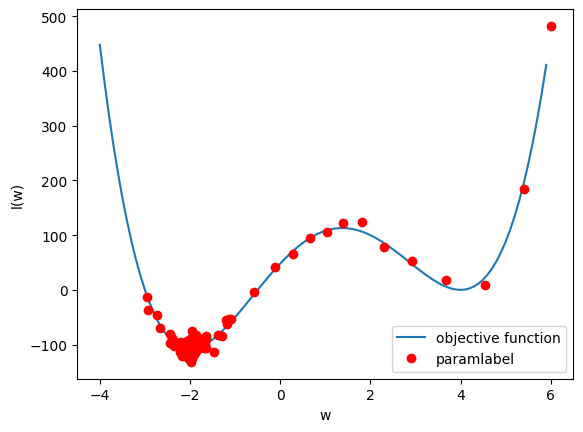

In [11]:
optimizer = torch.optim.SGD(w.parameters(), lr=0.001,momentum=0.9)
plot_fourth_order(w, optimizer, std=10)